# Project 5. K-means for clustering crime cases using Pyspark

In [0]:
# import packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Load uncleaned dataset
# File location and type
file_location = "/FileStore/tables/Crimes_uncleaned.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

_c0,_c1
41.85118101,-87.70538082
41.87899707,-87.72428759
41.90483483,-87.75794861
41.8836395,-87.76038627
41.8836395,-87.76038627
41.89422779,-87.7421732
41.91283243,-87.69231846
41.8145458,-87.70653117
41.90974633,-87.74535482
41.89242429,-87.72370095


In [0]:
# removing all empty rows
df.filter("_c0 IS NOT NULL AND _c1 IS NOT NULL").show()

+-----------+------------+
 _c0| _c1|
+-----------+------------+
41.85118101|-87.70538082|
41.87899707|-87.72428759|
41.90483483|-87.75794861|
 41.8836395|-87.76038627|
 41.8836395|-87.76038627|
41.89422779| -87.7421732|
41.91283243|-87.69231846|
 41.8145458|-87.70653117|
41.90974633|-87.74535482|
41.89242429|-87.72370095|
41.76399188|-87.62150823|
41.73597463|-87.62942021|
41.96946253| -87.7303839|
 41.7719812|-87.60714484|
41.78360558|-87.63812824|
41.72519943|-87.57284172|
 41.9028188|-87.72616244|
41.87917642| -87.6931837|
 41.7533653|-87.55862322|
41.67433293|-87.61587905|
+-----------+------------+
only showing top 20 rows

In [0]:
# converting data into rdd
data = df.rdd.map(lambda line: (float(line[0]), float(line[1])))

In [0]:
# Counting the number of rows
data.count()

Out[136]: 1042474

In [0]:
# Spliting the dataset into 80/20
(trainingdata, testdata) = data.randomSplit([0.8, 0.2], seed=100)
print(trainingdata.count())
print(testdata.count())

834151
208323

### From the split done above, we have 80% split which is our training data set having 834151 points and 20% split which is our test data set having 208323 points

In [0]:
# changing training data to float
training = trainingdata.map(lambda line: (float(line[0]), float(line[1])))
training.take(1)

Out[141]: [(41.85118101, -87.70538082)]

In [0]:
#Import packages from MLlib
from pyspark.mllib.clustering import KMeans
#
# the dataset is called training from cmd8; k is 5
clusters = KMeans.train(training, 5, maxIterations=10, initializationMode="random")
#
#Print the number of points within each cluster
resultRDD = training.map(lambda point: clusters.predict(point)).cache()
print("Total members of each cluster:")
print(resultRDD.countByValue())
#
# print("Cluster assignments per point:")
# print(resultRDD.collect())

Total members of each cluster:
defaultdict(<class 'int'>, {0: 152172, 1: 225287, 4: 94670, 2: 160846, 3: 201176})

### In cmd12 is our clusters. We have our first cluster labeled 0 to have 152172 points, followed by cluster labeled 1 225287 to be  points. The third cluster labeled 2 has 160846 points and the fourth cluster labeled 3 has  201176 points. The last cluster has 94670 points.

In [0]:
# saving the cluster results for training dataset
resultRDD.saveAsTextFile("/FileStore/tables/result_3.csv")

In [0]:
# Shows the cluster centers (mean).
centers = clusters.clusterCenters
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[ 41.79204764 -87.68804342]
[ 41.9064241 -87.74314688]
[ 41.77345287 -87.6021203 ]
[ 41.92375233 -87.65920555]
[ 41.70464641 -87.62459533]

### In cmd15 is our cluster centers points. We have our first center to be 41.79204764 -87.68804342, followed by 41.9064241  -87.74314688. The third cluster center is  41.77345287 -87.6021203  and the fourth cluster center is 41.92375233 -87.65920555. The last cluster center is 41.70464641 -87.62459533. 

In [0]:
#Evaluate clustering by computing Within Set Sum of Squared Errors for training dataset
from math import sqrt
#
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = training.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 33970.610893363075

### The Sum of Square Errors for the training dataset is 33970.610893363075

In [0]:
# using python approach for optimal K
# displaying results
train = spark.createDataFrame(training).toDF("lat", "long")
display(train)

lat,long
41.85118101,-87.70538082
41.87899707,-87.72428759
41.90483483,-87.75794861
41.8836395,-87.76038627
41.8836395,-87.76038627
41.89422779,-87.7421732
41.89242429,-87.72370095
41.73597463,-87.62942021
41.96946253,-87.7303839
41.78360558,-87.63812824


In [0]:
# convert the pyspark dataframe into pandas datafram

train=train.toPandas()

In [0]:
# Finding optimal K when K=5 clusters.
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
# elbow method
# calculate distortion for a range of number of cluster
MSE = []
for i in range(1, 6):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(train)
    MSE.append(km.inertia_)
MSE  

Out[180]: [9233.999539956707,
 3524.114060322813,
 2697.0156556933402,
 2048.9299226827766,
 1648.5198776545672]

### Above is the Mean Sum of Errors for all 5 clusters

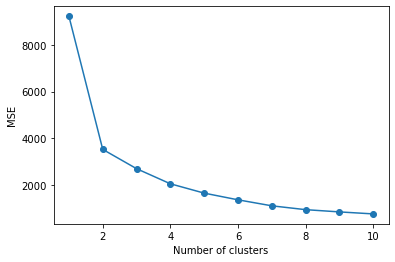

In [0]:
# Finding optimal K when K=4 clusters (Plot).
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
# elbow method
# calculate distortion for a range of number of cluster
MSE = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(train)
    MSE.append(km.inertia_)

# plot
plt.plot(range(1, 11), MSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('MSE')
plt.show()

### with our mean sum of errors being 3524.114060322813, the plot above vividly shows that two clusters thus k=2 provides the best fit using the elbow method.

In [0]:
# converting test data to float
test = testdata.map(lambda line: (float(line[0]), float(line[1])))
test.take(1)

Out[154]: [(41.91283243, -87.69231846)]

In [0]:
# classifying the test dataset into clusters using an already built algorithm
#Import packages from MLlib
from pyspark.mllib.clustering import KMeans
#

#
#Print the number of points within each cluster
resultRDD1 = test.map(lambda point: clusters.predict(point)).cache()
print("Total members of each cluster:")
print(resultRDD1.countByValue())
#
# print("Cluster assignments per point:")
# print(resultRDD.collect())

Total members of each cluster:
defaultdict(<class 'int'>, {3: 50256, 0: 37719, 1: 56393, 2: 40157, 4: 23798})

### In cmd27 is our clusters. We have our first cluster labeled 0 to have 37719 points, followed by cluster labeled 1 which has 56393 points. The third cluster labeled 2 has 40157 points and the fourth cluster labeled 3 has 6 50256 points. The last cluster has 23798 points.

In [0]:
# Saving the results for the number of clusters
resultRDD1.saveAsTextFile("/FileStore/tables/result_0.csv")

In [0]:
# Shows the cluster centers.
centers = clusters.clusterCenters
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[ 41.79204764 -87.68804342]
[ 41.9064241 -87.74314688]
[ 41.77345287 -87.6021203 ]
[ 41.92375233 -87.65920555]
[ 41.70464641 -87.62459533]

### In cmd30 is our cluster centers points. We have our first center to be 41.79204764 -87.68804342, followed by 41.9064241  -87.74314688. The third cluster center is  41.77345287 -87.6021203  and the fourth cluster center is 41.92375233 -87.65920555. The last cluster center is 41.70464641 -87.62459533. 

In [0]:
#Evaluate clustering by computing Within Set Sum of Squared Errors
from math import sqrt
#
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = test.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

Within Set Sum of Squared Error = 8456.133116596708

### The Mean Sum of Errors for the test dataset is 8456.133116596708

In [0]:
# using python approach for optimal K for test dataset
# displaying results
test = spark.createDataFrame(test).toDF("lat", "long")
display(test)

lat,long
41.91283243,-87.69231846
41.8145458,-87.70653117
41.90974633,-87.74535482
41.76399188,-87.62150823
41.7719812,-87.60714484
41.67433293,-87.61587905
41.9225329,-87.78039167
41.95077658,-87.64947528
41.89214181,-87.62431451
41.67728378,-87.6164283


In [0]:
# convert the pyspark dataframe into pandas datafram
test=test.toPandas()

In [0]:
# # Finding optimal K when K=4 clusters.
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
# elbow method
# calculate distortion for a range of number of cluster
MSE = []
for i in range(1, 6):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(test)
    MSE.append(km.inertia_)
MSE    

Out[182]: [2298.3272175209827,
 872.3279929936975,
 667.6611071162495,
 506.6317102766053,
 407.29713326135675]

### Above is the MSE for each cluster with the test dataset

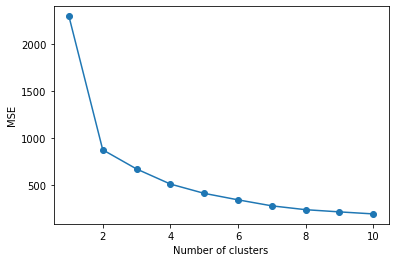

In [0]:
# # Finding optimal K when K=4 clusters.
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
# elbow method
# calculate distortion for a range of number of cluster
MSE = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(test)
    MSE.append(km.inertia_)

# plot
plt.plot(range(1, 11), MSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('MSE')
plt.show()

### with our mean sum of errors being 872.3279929936975, the plot above vividly shows that two clusters thus k=2 provides the best fit using the elbow method.

# Conveying the cluster centers or clusters for the training dataset and the test dataset on pie charts

In [0]:
# loading training dataset for pie chart
# File location and type
file_location = "/FileStore/tables/result_3.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df1 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df1)

_c0
1
1
1
0
3
1
3
1
0
4


In [0]:
%python
df1 = df1.withColumn("_c0", df1["_c0"].cast("int"))
display(df1)

_c0
1
1
1
0
3
1
3
1
0
4


In [0]:
# loading test dataset for pie chart
# File location and type
file_location = "/FileStore/tables/result_0.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df2 = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df2)

_c0
0
4
0
2
2
2
3
1
0
3


In [0]:
%python
df2 = df2.withColumn("_c0", df2["_c0"].cast("int"))
display(df2)

_c0
0
4
0
2
2
2
3
1
0
3


## Does the training data fit the test data well? Draw conclusions about model performance.
### The training data fits the test well from the from the two pie charts given. Even though there are outliers for the points, the grouping of points into clusters had no significant differences for training data clusters and test data clusters. As it can be seen from the two pie charts are the same for both training data and test data. Also, the cluster center remained the same for both test data and training data. In conclusion, the performance of the model is good. This can be seen from obtaining the optimal K for both training data and test data where the number of clusters that provides the best fit was 2.

## Can this clustering information help Chicago PD or politicians make informed decisions?

### The clustering information can help Chicago PD predict where crimes will occur so as to eradicate all point or areas where harden criminals hide to commit crime. The Chicago with this information can deploy night patrol teams to the cluster centers and its environs. Also, with this information the police can caution people in such areas to be vigilant and help the Police keep them safe. Another way the police can use this information is by installing both hidden and visible cameras to help prevent crime and to protect the people in the area.
### Politicians with this clustering information will be able to make decisions to well equipped the law enforcement agencies within these high crime committing areas by providing them with the necessary funding to run their day-to-day activities in order to protect the people. 